In [11]:
#1. LSA 예제 분석
#- 데이터 준비-tfidf로 vectorizer된 tdm

import pandas as pd
import joblib
with open('amazon.pkl', 'rb') as f:
    data = joblib.load(f) 
locals().update(data)


In [12]:
print(tdm[999,:100])

  (0, 73)	0.5963034327143681


In [13]:
type(tdm)

scipy.sparse._csr.csr_matrix

In [14]:
print(tdm[1:5])

  (0, 912)	0.6392095406476104
  (0, 255)	0.47823718132718357
  (0, 146)	0.4710276120116065
  (0, 306)	0.3752776975307017
  (1, 355)	0.8909828883166824
  (1, 310)	0.4540368847647319
  (2, 518)	0.3180236844892277
  (2, 407)	0.3548643091675774
  (2, 20)	0.4294194741822417
  (2, 368)	0.40528919670525015
  (2, 185)	0.3881684923718809
  (2, 155)	0.2986569556075369
  (2, 818)	0.4294194741822417
  (3, 405)	0.8844341363224174
  (3, 310)	0.4666650388743726


In [15]:
# - LSA 적용
#  특이값 분해로 차원을 축소한다.

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=30)

# svd.fit_transform()에 tdm을 넘겨줘서 차원을 축소한다.
pos = svd.fit_transform(tdm)
pos.shape


(1000, 30)

In [16]:
pos[0],pos[1]

(array([ 0.01202443,  0.00427666,  0.00352526,  0.01172501,  0.02464755,
         0.00739944,  0.00050757,  0.01443909,  0.00673484, -0.03445305,
         0.0391093 ,  0.02751258, -0.01268976,  0.00483503,  0.02184654,
        -0.0270759 ,  0.01414012,  0.00501418, -0.00437297, -0.00235463,
         0.02036274,  0.0319087 , -0.00495345, -0.01600575,  0.03266971,
        -0.03292441, -0.00864665, -0.02613485,  0.05329413, -0.04419401]),
 array([ 0.11208253,  0.35322849,  0.21312949,  0.05801024, -0.02292011,
         0.00185392,  0.02373505, -0.09387659,  0.09096601, -0.02265249,
        -0.20087292,  0.10186323,  0.08790947, -0.09997085, -0.20142813,
        -0.30725908,  0.00606182, -0.00970667, -0.00482166,  0.17881322,
        -0.12914311,  0.29170615,  0.12047421,  0.05492684, -0.11406959,
         0.00980921,  0.06036421,  0.07684581, -0.01754519, -0.07723105]))

In [19]:
import pandas as pd

# pos의 형태 출력
print(f'pos의 형태: {pos.shape}')

# 각 차원에 대한 컬럼 이름 생성
column_names = [f'Dimension_{i+1}' for i in range(30)]

# 데이터프레임 생성
pos_df = pd.DataFrame(pos, columns=column_names)

# pos_df의 행과 컬럼 이름 출력
print(pos_df)


pos의 형태: (1000, 30)
     Dimension_1  Dimension_2  Dimension_3  Dimension_4  Dimension_5  \
0       0.012024     0.004277     0.003525     0.011725     0.024648   
1       0.112083     0.353228     0.213129     0.058010    -0.022920   
2       0.334501    -0.006423    -0.243826    -0.035603    -0.141419   
3       0.020934    -0.000650     0.004319     0.006786     0.003201   
4       0.345339    -0.003285    -0.247736    -0.040587    -0.138192   
..           ...          ...          ...          ...          ...   
995     0.021922    -0.001562     0.033350     0.006664     0.043987   
996     0.141827    -0.116316     0.167737    -0.001444     0.022628   
997     0.036260     0.020964     0.014777    -0.012470     0.027323   
998     0.007813     0.001756     0.010370     0.000059     0.011134   
999     0.021284     0.002559     0.012197    -0.001042     0.009144   

     Dimension_6  Dimension_7  Dimension_8  Dimension_9  Dimension_10  ...  \
0       0.007399     0.000508     0.0

In [18]:
pos[sentiment]

array([[ 0.01202443,  0.00427666,  0.00352526, ..., -0.02613485,
         0.05329413, -0.04419401],
       [ 0.11208253,  0.35322849,  0.21312949, ...,  0.07684581,
        -0.01754519, -0.07723105],
       [ 0.11208253,  0.35322849,  0.21312949, ...,  0.07684581,
        -0.01754519, -0.07723105],
       ...,
       [ 0.01202443,  0.00427666,  0.00352526, ..., -0.02613485,
         0.05329413, -0.04419401],
       [ 0.01202443,  0.00427666,  0.00352526, ..., -0.02613485,
         0.05329413, -0.04419401],
       [ 0.01202443,  0.00427666,  0.00352526, ..., -0.02613485,
         0.05329413, -0.04419401]])

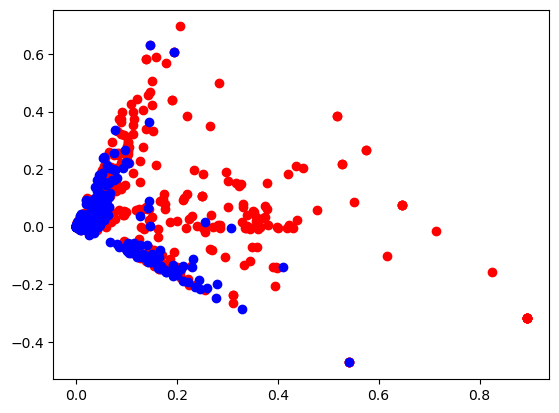

In [15]:
# - 시각화

import matplotlib.pyplot as plt
%matplotlib inline
dim1 = 0
dim2 = 1

plt.plot(pos[sentiment == 1, dim1], pos[sentiment == 1, dim2], 'ro')  # 긍정적인 코멘트 (r 빨간색, o 원형)
plt.plot(pos[sentiment == 0, dim1], pos[sentiment == 0, dim2], 'bo')  # 부정적인 코멘트 (파란색)



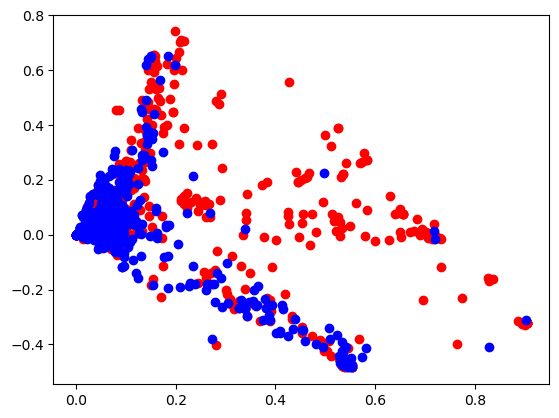

In [18]:
#- 데이터 정규화
#  LSA로 만들어진 좌표는 문서의 길이에 영향을 받는다. 이 영향을 제거하기 위해 문서의 원점에서 거리를 1로 변환을 해줄 수 있다.

from sklearn.preprocessing import Normalizer
norm = Normalizer(copy=False)

# 입력이 이미 numpy배열이거나 CSR매트릭스인 경우 False로 설정
pos2 = norm.fit_transform(pos)
dim1 = 0
dim2 = 1

plt.plot(pos2[sentiment == 1, dim1], pos2[sentiment == 1, dim2], 'ro')  # 긍정적인 코멘트 (빨간색)
plt.plot(pos2[sentiment == 0, dim1], pos2[sentiment == 0, dim2], 'bo')  # 부정적인 코멘트 (파란색)


In [13]:
# - 파이프라인 만들어 스텝 줄이기
#   LSA와 노멀라이징처럼 2단계의 변환이 필요한 경우 파이프라인으로 만들어두면 한 번에 처리를 할 수 있다.
#   사이킷런의 Pipeline 클래스는 연속된 변환을 순차적으로 처리할 수 있는 기능을 제공

from sklearn.pipeline import make_pipeline
lsa = make_pipeline(svd, norm)
lsa.transform(tdm)


array([[ 0.11537978,  0.04113347,  0.03350674, ...,  0.04248874,
         0.26400944,  0.03490911],
       [ 0.14571546,  0.45918104,  0.27713176, ...,  0.10603526,
        -0.07939655, -0.03350663],
       [ 0.71722839, -0.01377056, -0.52279772, ...,  0.04367106,
        -0.03818838, -0.0707227 ],
       ...,
       [ 0.06567552,  0.03790232,  0.02686308, ..., -0.081351  ,
        -0.01611881,  0.29544652],
       [ 0.05099115,  0.01124415,  0.06775929, ..., -0.48875387,
        -0.43990891, -0.09114275],
       [ 0.06664041,  0.00809107,  0.03818555, ..., -0.15583723,
        -0.08884873, -0.13780487]])